In [1]:
using JLD, PyPlotb

In [2]:
archivo="LFP_Promedio_est_con5.jld"

"LFP_Promedio_est_con5.jld"

In [3]:
Arxivo=load(archivo)

Dict{ByteString,Any} with 11 entries:
  "latencia"          => 27
  "kCSD"              => 64x64x1163 Array{Float64,3}:…
  "final"             => 1072
  "CSDLindenberg"     => 64x64x1163 Array{Float64,3}:…
  "kCSD_r_0_5"        => 64x64x1163 Array{Float64,3}:…
  "Canalesrespuesta"  => Set([[33,57],[25,39],[33,56],[30,48],[27,49],[19,34],[…
  "retrazo"           => 90
  "K_Dura_r_0.5-4095" => 64x64x1163 Array{Float64,3}:…
  "freq"              => 17.85550205219098
  "LFPSaturados"      => 64x64x1163 Array{Float64,3}:…
  "CanalesSaturados"  => Set([[11,63],[41,46],[6,37],[44,23],[9,41],[9,43],[15,…

In [6]:
CSD=Arxivo["K_Dura_r_0.5-4095"]

64x64x1163 Array{Float64,3}:
[:, :, 1] =
   0.0          0.619119    0.741628   0.70406    …  -0.074831    -0.0475656 
   0.24101      0.678342    0.807138   0.856266       0.00687473   0.0287866 
   0.0738355    0.604826    0.805345   0.914542       0.0430312    0.0190621 
  -0.373262     0.324539    0.715133   0.881808       0.0778928    0.0125789 
  -1.43818     -0.298902    0.490488   0.820009       0.102861     0.0554155 
  -3.83013     -1.53364     0.0437496  0.703859   …   0.0342046    0.0797387 
  -8.38091     -2.82545    -0.342938   0.616116       0.0688071    0.0815311 
  -5.05239     -2.37276    -0.364221   0.614708       0.10866      0.141841  
  -4.69485     -2.35363    -0.496627   0.561741       0.102573     0.111807  
  -7.16607     -3.50978    -0.982833   0.382799       0.0768501    0.0829441 
 -10.4787      -5.5896     -1.72523    0.175794   …   0.027459     0.0158149 
 -19.1996      -7.42072    -2.0518     0.102489      -0.0195483   -0.00122297
  -9.23575     -4.91721

In [8]:
listonga=(135,139,139)   

(135,139,139)

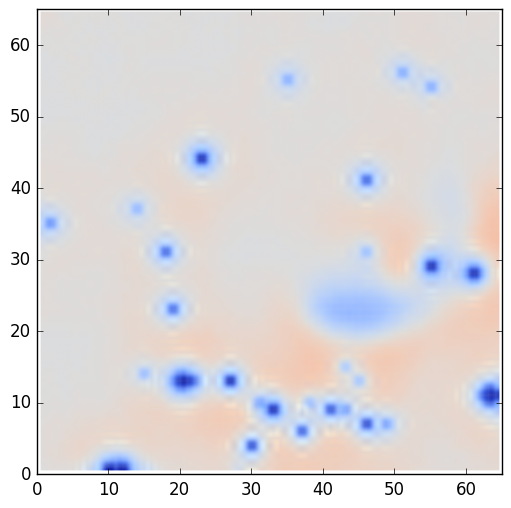

PyObject <matplotlib.image.AxesImage object at 0x7fdc59608828>

In [14]:
t=149
limites=10
figure(figsize=(6,6))
    xlim(0,65)
    ylim(0,65)

    ejemplo=CSD[:,:,t]
    #tiempo=round((t-retrazo)/frecuencia,1)
    #title("t= $tiempo")
    imagen=imshow(transpose(ejemplo), origin="lower", interpolation="sinc",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])
   # cb=colorbar(imagen, fraction=0.046)
   